# NLP with the HF Transformers library

In [1]:
!pip install -q transformers tokenizers datasets torch accelerate evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00


In [15]:
from datasets import load_dataset
resume7_ds = load_dataset("ganchengguang/resume-5label-classification")
resume7_df = resume7_ds["train"].to_pandas()

Repo card metadata block was not found. Setting CardData to empty.


In [16]:
resume7_df[["label_meta", "label", "line_content"]] = resume7_df["text"].str.split("\t", expand=True, n=2)
resume7_df.head()

,text,label_meta,label,line_content
0,meta\tothers\tJitesh Vishwakarma,meta,others,Jitesh Vishwakarma
1,meta\tothers\tE-mail-Id: - jvishwakarma123@gma...,meta,others,E-mail-Id: - jvishwakarma123@gmail.com
2,meta\tothers\tContact Number: - 9960902548,meta,others,Contact Number: - 9960902548
3,header\texperience\tPROFESSIONAL SUMMARY:,header,experience,PROFESSIONAL SUMMARY:
4,content\texperience\t· 4 years of technical ex...,content,experience,· 4 years of technical experience in implement...


In [19]:
resume7_df.groupby(["label_meta", "label"]).head(3)

,text,label_meta,label,line_content
0,meta\tothers\tJitesh Vishwakarma,meta,others,Jitesh Vishwakarma
1,meta\tothers\tE-mail-Id: - jvishwakarma123@gma...,meta,others,E-mail-Id: - jvishwakarma123@gmail.com
2,meta\tothers\tContact Number: - 9960902548,meta,others,Contact Number: - 9960902548
3,header\texperience\tPROFESSIONAL SUMMARY:,header,experience,PROFESSIONAL SUMMARY:
4,content\texperience\t· 4 years of technical ex...,content,experience,· 4 years of technical experience in implement...
5,content\texperience\t· Having Domain Experienc...,content,experience,"· Having Domain Experience in PAYMENT, AUTOMOB..."
6,content\texperience\t· Experienced in developi...,content,experience,· Experienced in developing Web based applicat...
11,header\tknowledge\tTECHNICAL SKILLS:,header,knowledge,TECHNICAL SKILLS:
12,content\tknowledge\t· Software Products: Apach...,content,knowledge,"· Software Products: Apache Tomcat Server, Web..."
13,"content\tknowledge\t· Language: Java, J2EE, Sp...",content,knowledge,"· Language: Java, J2EE, Spring, Hibernate, EJB..."


<Axes: xlabel='label'>

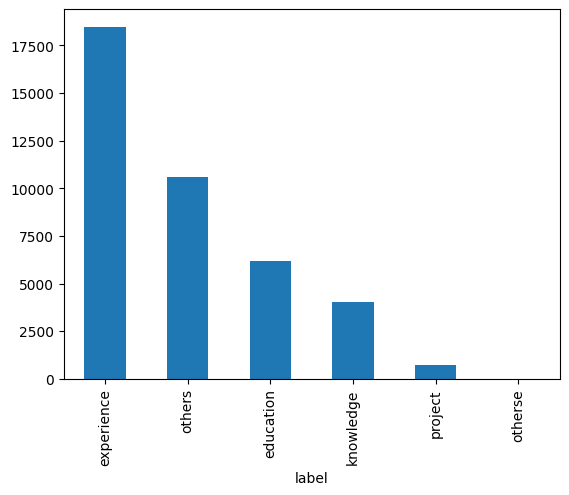

In [21]:
resume7_df["label"].value_counts().plot(kind="bar")

In [22]:
# Replace labels that we do not use
resume7_df = resume7_df.replace(to_replace=["project", "otherse"], value="others")

# Remove the empty rows
resume7_df = resume7_df.dropna(axis=0)
resume7_df.shape

(40001, 4)

In [23]:
# Recompute labels
labels = resume7_df["label"].unique().tolist()
labels

['others', 'experience', 'knowledge', 'education']

<Axes: xlabel='label'>

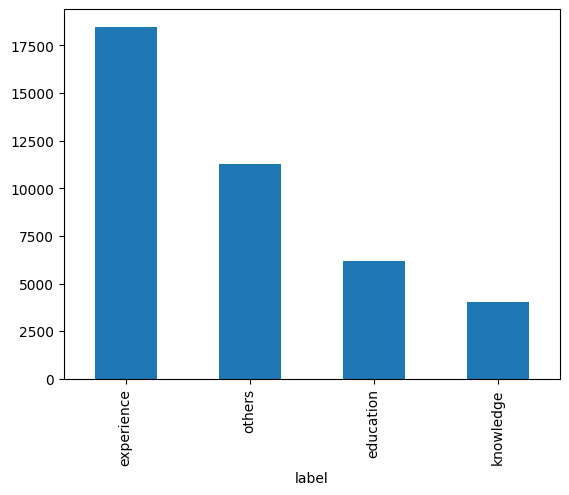

In [24]:
# Let's review the distribution of the labels
resume7_df["label"].value_counts().plot(kind="bar")

In [30]:
noise_rows = resume7_df[resume7_df["line_content"].str.len() < 10]["label"]
resume7_df.iloc[noise_rows.index, 2] = "others"
resume7_df[resume7_df["line_content"].str.len() < 10]

<Axes: xlabel='label'>

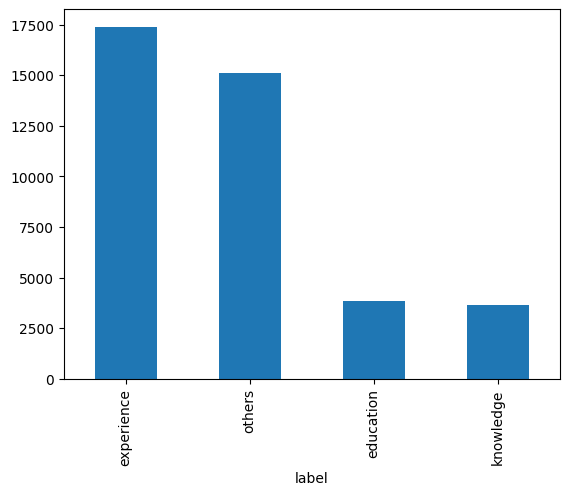

In [34]:
resume7_df["label"].value_counts().plot(kind="bar")

In [35]:
# Now let's simply retain the minimum number of samples per class label
min_samples = resume7_df["label"].value_counts().min()

resume7_df = resume7_df.groupby("label").apply(lambda x: x.sample(min_samples, random_state=42)).reset_index(drop=True)
resume7_df

,text,label_meta,label,line_content
0,"content\teducation\tDRBCCC Hindu College, Patt...",content,education,"DRBCCC Hindu College, Pattabiram. - Affiliated..."
1,content\teducation\tICMAI INTER 2017,content,education,ICMAI INTER 2017
2,content\teducation\t· Biju Patnaik University ...,content,education,"· Biju Patnaik University of Technology, Oriss..."
3,"content\teducation\tMathematics, Accounts, Eco...",content,education,"Mathematics, Accounts, Economics, OC, Hindi, E..."
4,content\teducation\t· Post Graduation Diploma ...,content,education,"· Post Graduation Diploma in Management, in Fi..."
...,...,...,...,...
14535,"meta\tothers\tStrengths: Optimism, Self Motiva...",meta,others,"Strengths: Optimism, Self Motivator, Analytica..."
14536,meta\tothers\tAddress: Shivesh Srivastava s/o ...,meta,others,Address: Shivesh Srivastava s/o Kamlesh Kumar ...
14537,header\tothers\tRESUME,header,others,RESUME
14538,content\texperience\tProcess,content,others,Process


In [36]:
resume7_df["label"].value_counts()

label
education     3635
experience    3635
knowledge     3635
others        3635
Name: count, dtype: int64

In [37]:
resume7_df["line_content"].apply(lambda x: len(x.split(" "))).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    14540.000000
mean         5.883906
std          6.323044
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
90%         13.000000
95%         17.000000
99%         30.000000
max        104.000000
Name: line_content, dtype: float64

In [38]:
from datasets import Dataset, ClassLabel

resume7_ds = Dataset.from_pandas(resume7_df[["line_content", "label"]], preserve_index=False)
resume7_ds = resume7_ds.class_encode_column("label")
resume7_ds = resume7_ds.train_test_split(test_size=0.2, stratify_by_column="label", seed=42)
resume7_ds

Casting to class labels: 100%|██████████| 14540/14540 [00:00<00:00, 356007.66 examples/s]


DatasetDict({
    train: Dataset({
        features: ['line_content', 'label'],
        num_rows: 11632
    })
    test: Dataset({
        features: ['line_content', 'label'],
        num_rows: 2908
    })
})

In [13]:
# Setting the label list
# def label2id(example):
#     example["label"] = ClassLabel.str2int(example["label"])
#     return example

# def id2label(example):
#     example["label"] = ClassLabel.int2str(example["label"])
#     return example

# resume7_ds["train"][0]

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from torch.utils.data import DataLoader

In [15]:
d = {}
for index, val in enumerate(resume7_ds["train"].features["label"].names):
  d[index] = val

print(d)

{0: 'Edu', 1: 'Exp', 2: 'Oth', 3: 'Skill'}


In [16]:
resume7_ds["train"][5]

{'line_content': 'Tableau, SQL, MS-Business intelligence, MS-EXCEL.',
 'label': 3}

In [53]:
labels = resume7_ds["train"].features["label"].names

model_name = "nghuyong/ernie-2.0-base-en"

model_config = AutoConfig.from_pretrained(model_name,
        num_labels=len(labels),
        label2id={label: idx for idx, label in enumerate(labels)},
        id2label={idx: label for idx, label in enumerate(labels)})
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name) #, config=model_config)

#tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
#tokenizer.pad_token = tokenizer.eos_token

# resize model embedding to match new tokenizer
#model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
#model.config.pad_token_id = model.config.eos_token_id

Some weights of ErnieForSequenceClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
# tokenize the resume7_ds dataset
resume7_ds = resume7_ds.map(lambda example: tokenizer(example["line_content"], truncation=True, padding="max_length", max_length=128), batched=True, batch_size=64)
resume7_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])
resume7_ds.remove_columns(["line_content"])
#train_data_loader = DataLoader(dataset=resume7_ds["train"], batch_size=32)
#test_data_loader = DataLoader(dataset=resume7_ds["test"], batch_size=32)

#next(iter(data_loader))

Map:   0%|          | 0/15916 [00:00<?, ? examples/s]

Map:   0%|          | 0/3980 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 15916
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 3980
    })
})

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
import numpy as np
import torch
import evaluate

# Define Trainer parameters
def compute_metrics(p):
    logits, labels = p
    #print(f"Pred: {str(pred)}")

    #pred = torch.nn.functional.softmax(torch.Tensor(pred), dim=-1)
    #print(f"Pred probs: {str(pred)}")

    pred = np.argmax(logits, axis=-1)
    print(f"Pred labels: {str(pred[:20])}")

    print(f"TRUE labels: {str(labels[:20])}")

    acc_metric = evaluate.load("accuracy")
    acc = acc_metric.compute(predictions=pred, references=labels)

    #accuracy = accuracy_score(y_true=labels, y_pred=pred)
    #recall = recall_score(y_true=labels, y_pred=pred, average="micro")
    #precision = precision_score(y_true=labels, y_pred=pred, average="micro")
    #f1 = f1_score(y_true=labels, y_pred=pred, average="micro")

    #precision, recall, f1, _ = precision_recall_fscore_support(y_true=torch.Tensor(labels), y_pred=torch.Tensor(pred), average="micro")

    #return {"precision": precision, "recall": recall, "f1": f1}

    return acc

In [50]:
from transformers.trainer import Trainer, TrainingArguments
from transformers.trainer_callback import EarlyStoppingCallback

# Define Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=7,
    eval_steps=10,
    seed=42,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    fp16_opt_level="O1"
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=resume7_ds["train"],
    eval_dataset=resume7_ds["test"],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Train pre-trained model
trainer.train()


RuntimeError: ignored

In [35]:
trainer.save_model("/content/drive/My Drive/_workshop_models/ernie_83")

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
